<a href="https://colab.research.google.com/github/parthasarthi17/BtechProject/blob/main/BTP_Transfer_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

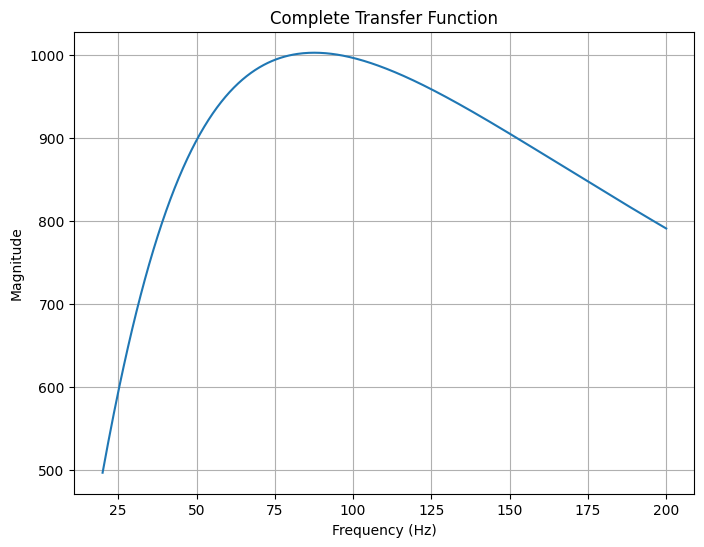

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define values for the high-pass filter
R_hp = 1e3  # 1 kOhm
C_hp = 3.3e-6  # 3.3 uF

# Define values for the low-pass filter
R_lp = 1e3  # 1 kOhm
C_lp = 1e-6  # 1 uF

frequencies = np.linspace(20, 200, 400)

s = 1j * 2 * np.pi * frequencies  # Complex frequency variable

H_hp = s * R_hp * C_hp / (1 + s * R_hp * C_hp)
H_lp = 1 / (1 + s * R_lp * C_lp)

# Calculate the product of the transfer functions

# gain of Instrumentation amplifier
gainI = 118.8

#gain of non-inverting differential amplifier
gainD = 11

transfer_function = gainI*H_lp*gainD*H_hp

plt.figure(figsize=(8, 6))
plt.plot(frequencies, np.abs(transfer_function))
plt.title('Complete Transfer Function')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Show the plot
plt.show()






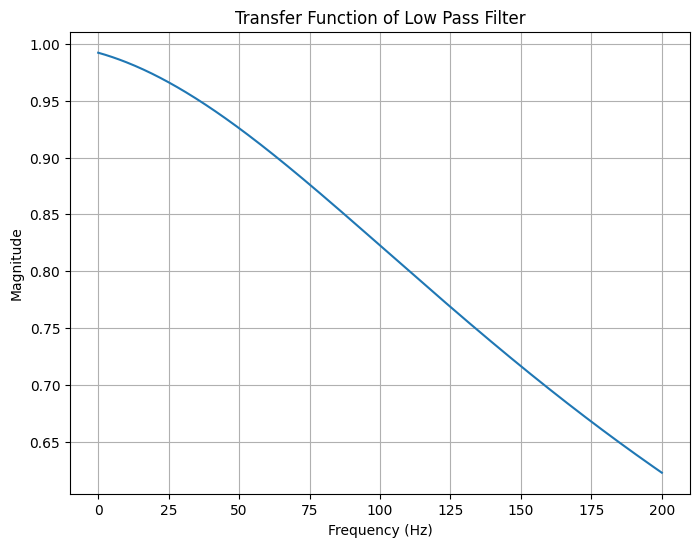

In [ ]:
frequencies2 = np.linspace(0, 200, 400)
plt.figure(figsize=(8, 6))
plt.plot(frequencies2, np.abs(H_lp))
plt.title('Transfer Function of Low Pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Show the plot
plt.show()


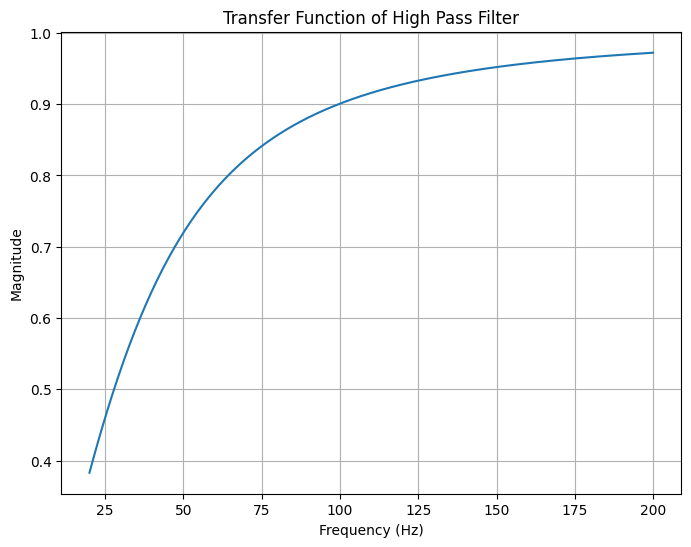

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(frequencies, np.abs(H_hp))
plt.title('Transfer Function of High Pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
data = np.column_stack((frequencies, np.abs(transfer_function)))
np.savetxt('transfer_function.csv', data, delimiter=',', header='Frequency (Hz),Magnitude', comments='')


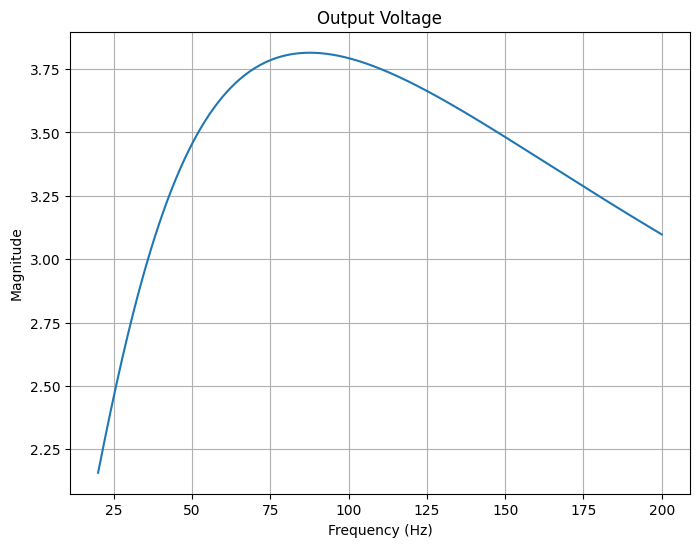

In [ ]:
#input voltage is in range of -5mv to +5mV, let us take peak to be +5V

i_V = 5*1e-3


#defining output voltage
o_V = i_V*transfer_function - 1.2 #roughly 1.2V drop due to diode

plt.figure(figsize=(8, 6))
plt.plot(frequencies, np.abs(o_V))
plt.title('Output Voltage')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
data = np.column_stack((frequencies, np.abs(o_V)))
np.savetxt('output_votage_ideal.csv', data, delimiter=',', header='Frequency (Hz),Magnitude', comments='')


In [ ]:
import sympy as sp

# Define the variable
s = sp.symbols('s')

# Define values for the high-pass filter
R_hp = 1e3  # 1 kOhm
C_hp = 3.3e-6  # 3.3 uF

# Define values for the low-pass filter
R_lp = 1e3  # 1 kOhm
C_lp = 1e-6  # 1 uF

# Define the transfer functions for the high-pass and low-pass filters
H_hp = s * R_hp * C_hp / (1 + s * R_hp * C_hp)
H_lp = 1 / (1 + s * R_lp * C_lp)

# Define the gains
gainI = 118.8
gainD = 11

# Define the overall transfer function
transfer_function = gainI * H_lp * gainD * H_hp

# Print the transfer function
print("Transfer Function H(s):")
sp.pprint(transfer_function)


Transfer Function H(s):
         4.31244⋅s          
────────────────────────────
(0.001⋅s + 1)⋅(0.0033⋅s + 1)


In [ ]:
from sympy import symbols, simplify, Eq, latex

s, R_hp, C_hp, R_lp, C_lp, gainI, gainD = symbols('s R_hp C_hp R_lp C_lp gainI gainD')

H_hp = s * R_hp * C_hp / (1 + s * R_hp * C_hp)
H_lp = 1 / (1 + s * R_lp * C_lp)

transfer_function = gainI * H_lp * gainD * H_hp

simplified_tf = simplify(transfer_function)

mathematical_form = Eq(symbols('H(s)'), simplified_tf)

print("Transfer Function H(s):")
print(latex(mathematical_form, mode='inline'))


Transfer Function H(s):
$H(s) = \frac{C_{hp} R_{hp} gainD gainI s}{\left(C_{hp} R_{hp} s + 1\right) \left(C_{lp} R_{lp} s + 1\right)}$
